In [12]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_df = pd.read_csv("StudentsPerformance.csv")
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student_df.columns = student_df.columns.str.replace(' ', '_')

## Data Preprocessing

In [4]:
display(student_df.describe())
display(student_df.describe(include=['O']))

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## EDA

Text(0.5, 1.0, 'Heatmap of Literacy Scores')

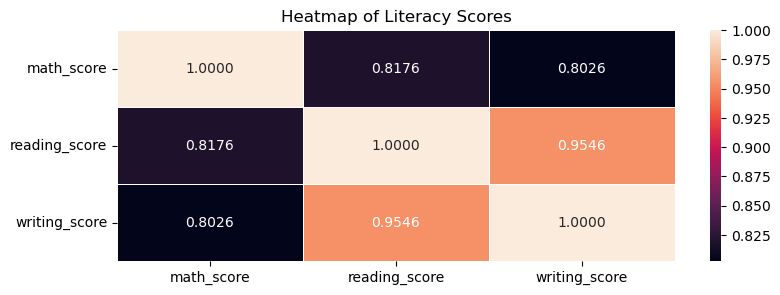

In [5]:
import numpy as np
%matplotlib inline

corr_matrix = student_df.corr(numeric_only=True)
plt.figure(figsize=(9, 3))
sns.heatmap(corr_matrix,annot=True, fmt='.4f', linewidth=.5)
plt.title("Heatmap of Literacy Scores")

In [6]:
student_df.iloc[:,5:8].apply(pd.to_numeric)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [8]:
# Find the average of literacy scores for each level of education
# group by = education
education_avg_df = student_df.groupby('parental_level_of_education')[['math_score', 'reading_score','writing_score']].mean()
education_avg_df

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


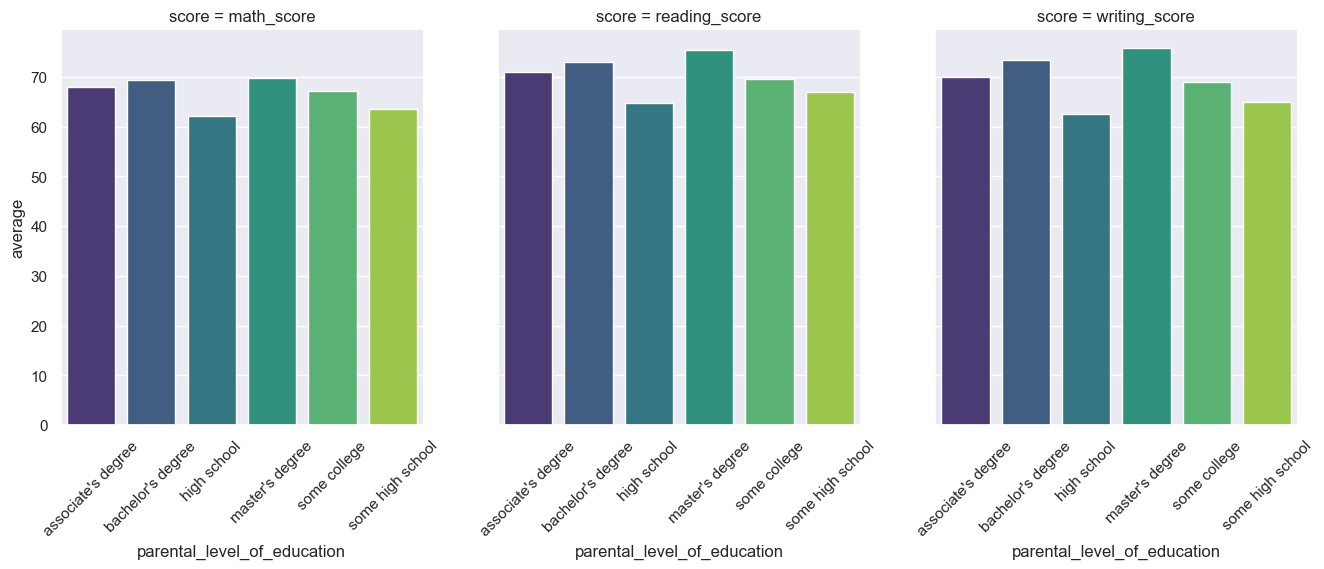

In [96]:
melted = education_avg_df.melt(var_name='score', value_name='average', ignore_index=False).reset_index()
sns.set_theme()
g=sns.catplot(data=melted, kind='bar', x='parental_level_of_education', y='average',
            col='score', hue='parental_level_of_education',palette='viridis',height=5, aspect=.9)

g.set_xticklabels(rotation=45)

In [47]:
race_avg_df = student_df.groupby('race/ethnicity')[['math_score', 'reading_score','writing_score']].mean()
race_avg_df

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


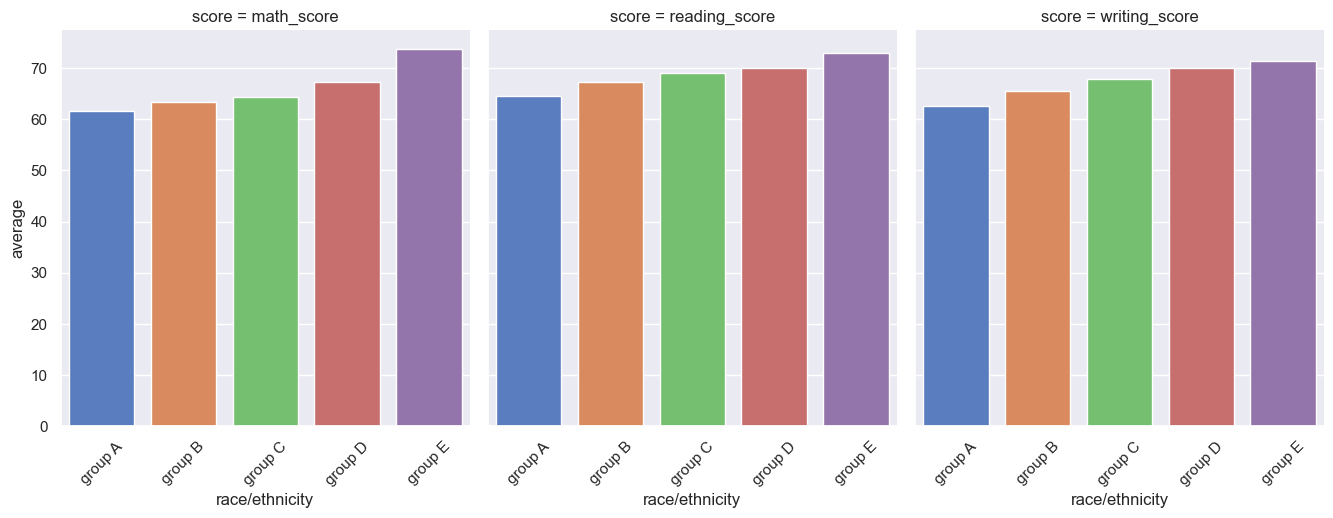

In [51]:
melted2 = race_avg_df.melt(var_name='score', value_name='average', ignore_index=False).reset_index()
g2=sns.catplot(data=melted2, kind='bar', x='race/ethnicity', y='average',
            col='score', hue='race/ethnicity',palette='muted',height=5, aspect=.9)

g2.set_xticklabels(rotation=45)

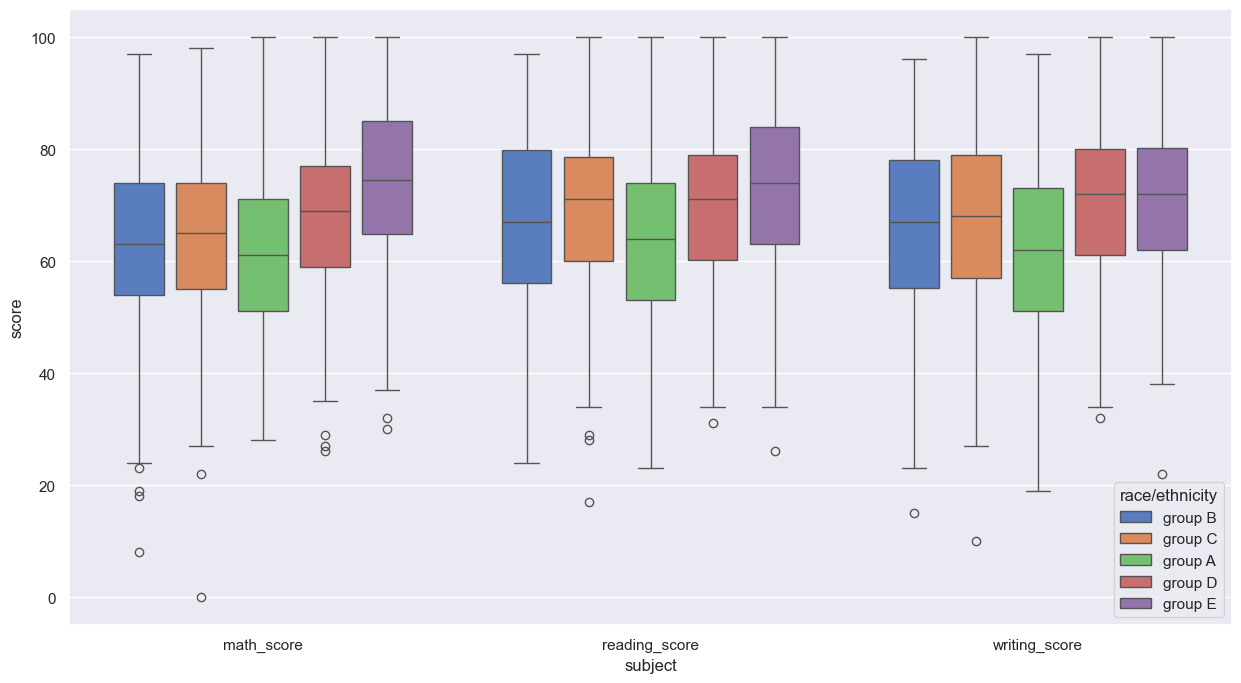

In [103]:
# Melt the data and include 'race/ethnicity'
melted = student_df.melt(id_vars=["race/ethnicity"], 
                         value_vars=["math_score", "reading_score", "writing_score"],
                         var_name="subject", value_name="score")
plt.figure(figsize=(15,8))
sns.boxplot(x="subject", y="score", hue="race/ethnicity", data=melted, palette="muted", linewidth=1, gap=.2)
plt.show()


In [48]:
gender_avg_df = student_df.groupby('gender')[['math_score','reading_score','writing_score']].mean()
gender_avg_df

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


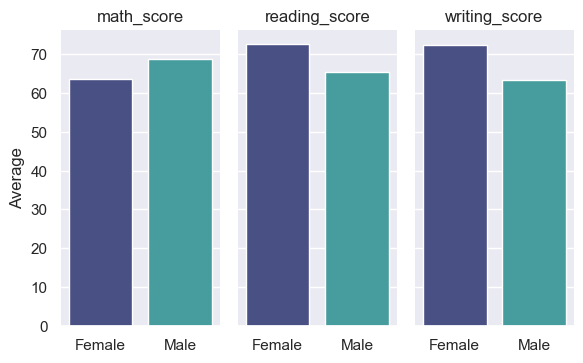

In [108]:
melted = gender_avg_df.melt(var_name='score',value_name='average',ignore_index=False).reset_index()
g=sns.catplot(melted,x="gender",y="average",col="score",hue="gender",kind="bar",palette="mako",height=4,aspect=.5)
g.set_axis_labels("", "Average")
g.set_xticklabels(["Female","Male"])
g.set_titles("{col_name}")
g.despine(left=True)

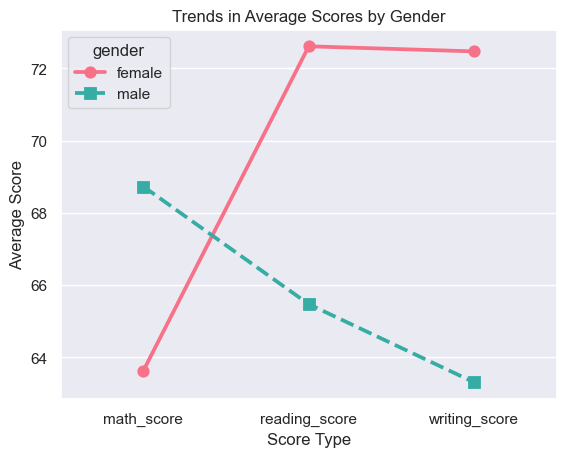

In [100]:
sns.pointplot(data=melted, x="score", y="average", hue="gender", palette="husl", markers=["o", "s"], linestyles=["-", "--"])
plt.title("Trends in Average Scores by Gender")
plt.ylabel("Average Score")
plt.xlabel("Score Type")
plt.show()

In [109]:
melted

,gender,score,average
0,female,math_score,63.633205
1,male,math_score,68.728216
2,female,reading_score,72.608108
3,male,reading_score,65.473029
4,female,writing_score,72.467181
5,male,writing_score,63.311203


In [107]:
pivot_data

score,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


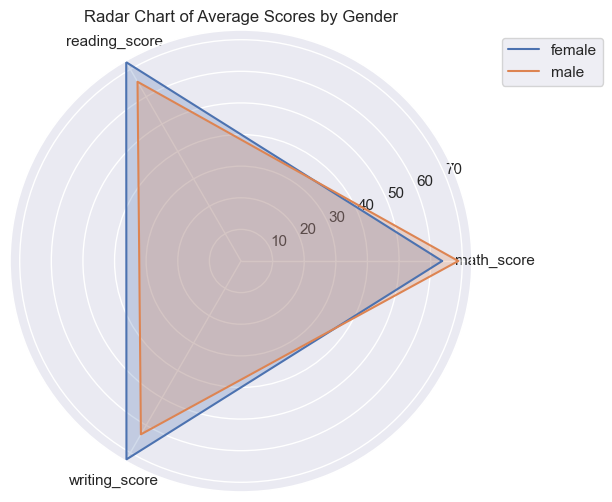

In [101]:
from math import pi

# Prepare data for radar chart
pivot_data = melted.pivot(index="gender", columns="score", values="average")
categories = pivot_data.columns.tolist()
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for gender, row in pivot_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=gender)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart of Average Scores by Gender")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()


## Conduct Hypothesis Testing through Regression
Objective: Math Score is influenced by the reading and writing scores 
Null Hypothesis: The predictors do not explain variability in writing scores 

Writing Score=β0​+β1​(Reading Score)+β2​(Math Score)+ϵ


Alternative Hypothesis: At least one predictor explains the variability of writing scores





In [7]:
import statsmodels.api as sm
X = student_df[['reading_score', 'writing_score']]  # Predictors
y = student_df['math_score']  # Response variable
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             math_score   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                        0.00
Time:                        11:59:40   Log-Likelihood:                         -3592.7
No. Observations:                1000   AIC:                                      7189.
Df Residuals:                     998   BIC:                                      7199.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------